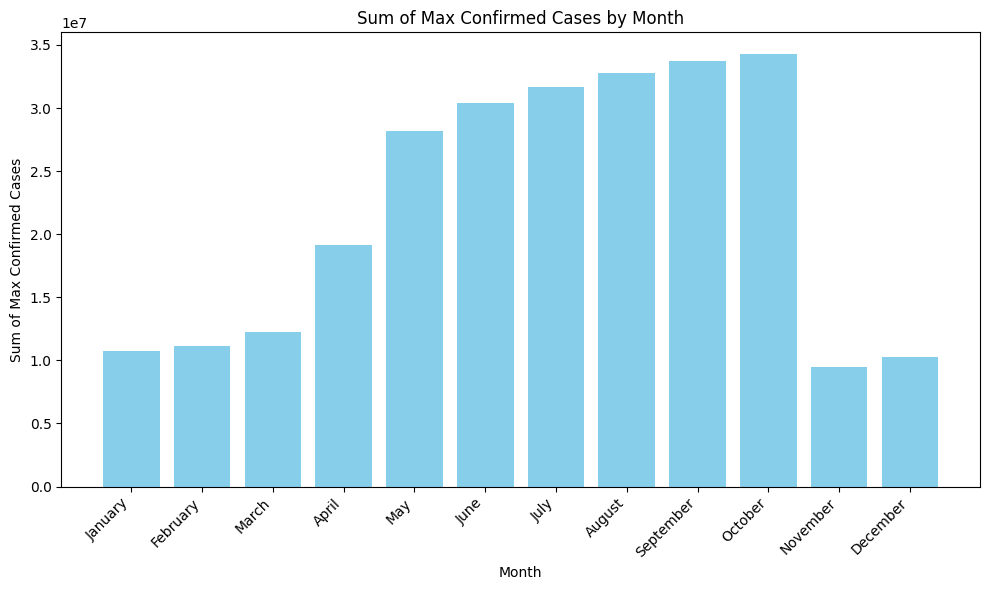

In [ ]:
import matplotlib.pyplot as plt

# Data
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
confirmed_cases = [10758629, 11112057, 12220717, 19157196, 28173884, 30410768, 31654740, 32810746, 33765504, 34285612, 9463256, 10286312]

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(months, confirmed_cases, color='skyblue')
plt.title('Sum of Max Confirmed Cases by Month')
plt.xlabel('Month')
plt.ylabel('Sum of Max Confirmed Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()


<ipython-input-13-c0ac26ceec93>:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-13-c0ac26ceec93>:59: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



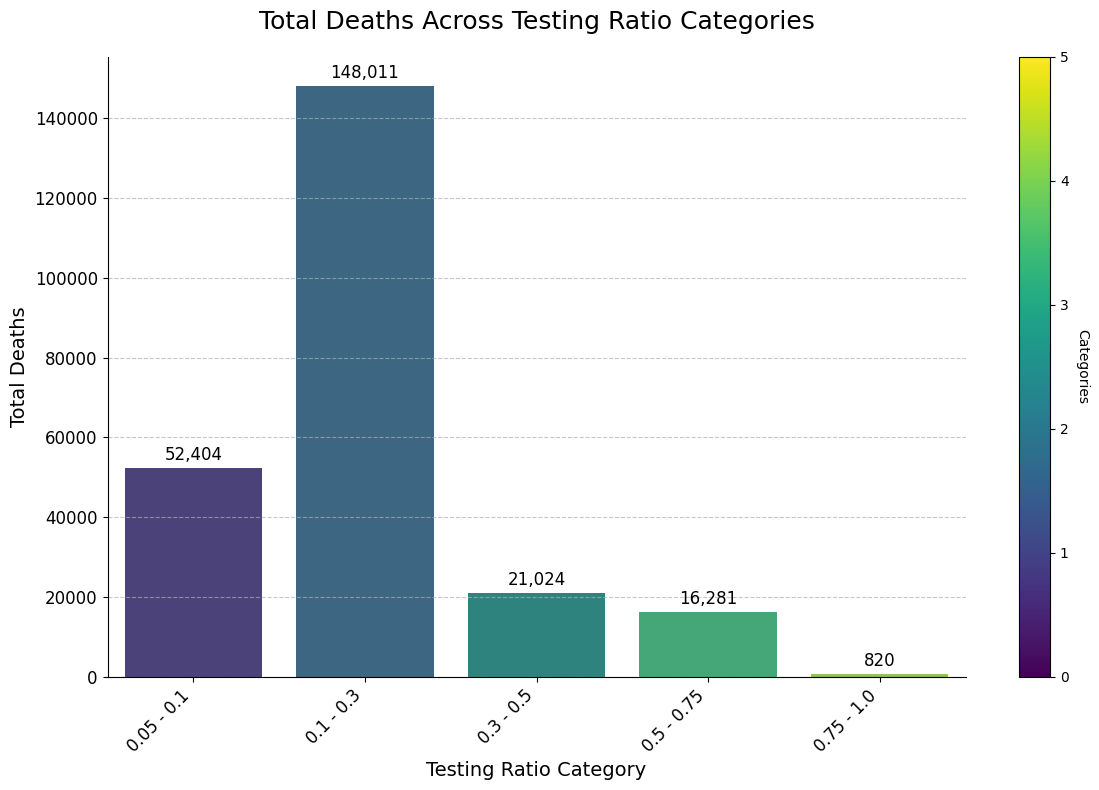

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a DataFrame
df = pd.read_csv('/content/DistrictWise_Data.csv')

# Calculate testing ratio (tr)
df['tr'] = df['Tested'] / df['Population']

# Function to categorize districts based on testing ratio (tr)
def categorize_district(tr):
    if 0.05 <= tr <= 0.1:
        return '0.05 - 0.1'
    elif 0.1 < tr <= 0.3:
        return '0.1 - 0.3'
    elif 0.3 < tr <= 0.5:
        return '0.3 - 0.5'
    elif 0.5 < tr <= 0.75:
        return '0.5 - 0.75'
    elif 0.75 < tr <= 1.0:
        return '0.75 - 1.0'
    else:
        return None  # Handle any outliers or unexpected values

# Apply categorization to create a new column 'tr_category'
df['tr_category'] = df['tr'].apply(categorize_district)

# Calculate total deaths across each category
deaths_by_category = df.groupby('tr_category')['Deceased'].sum().reset_index()

# Set up the plot with seaborn style and figure size
plt.figure(figsize=(12, 8))

# Create a bar plot with customized colors
colors = sns.color_palette('viridis', n_colors=len(deaths_by_category))
sns.barplot(data=deaths_by_category, x='tr_category', y='Deceased', palette=colors)

# Customizing the plot
plt.title('Total Deaths Across Testing Ratio Categories', fontsize=18, pad=20)
plt.xlabel('Testing Ratio Category', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels to the bars with value formatting
for index, row in deaths_by_category.iterrows():
    plt.text(index, row['Deceased'] + 1000, f'{row["Deceased"]:,.0f}', ha='center', va='bottom', fontsize=12)

# Adding interactivity and style enhancements
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Adding a color bar legend for better visual representation
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=len(deaths_by_category)))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Categories', rotation=270, labelpad=15)

# Show the plot
plt.show()


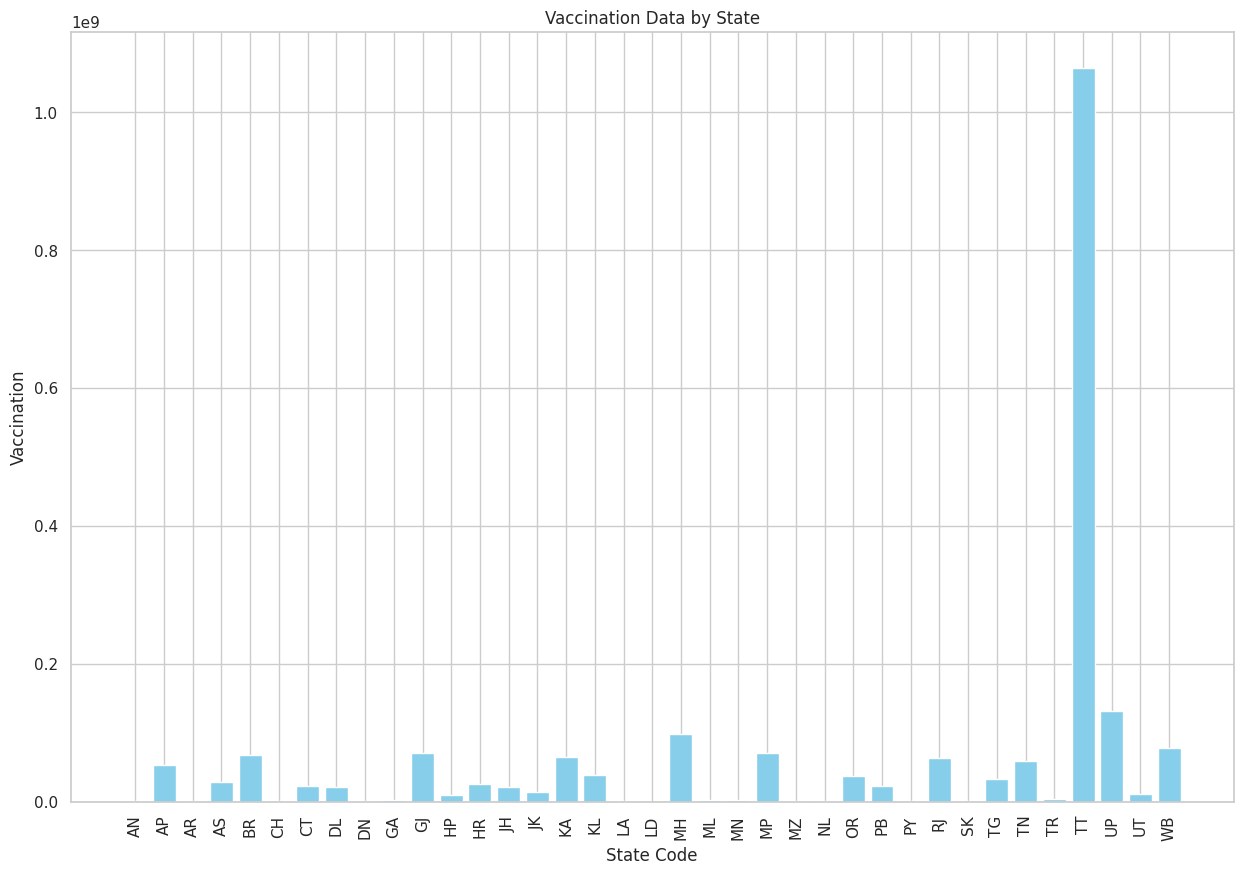

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    "state_code": ["AN", "AP", "AR", "AS", "BR", "CH", "CT", "DL", "DN", "GA", "GJ", "HP", "HR", "JH", "JK", "KA", "KL", "LA", "LD", "MH", "ML", "MN", "MP", "MZ", "NL", "OR", "PB", "PY", "RJ", "SK", "TG", "TN", "TR", "TT", "UP", "UT", "WB"],
    "vaccination": [494158, 53352150, 1306361, 28241258, 68221609, 1473016, 22194955, 20481040, 1031008, 2173682, 70707604, 9157518, 25887839, 20572294, 14660544, 65356145, 38964842, 361078, 101080, 98174486, 1745094, 1968849, 70749983, 1223626, 1200216, 37297553, 22181687, 1138277, 62642544, 973272, 32270957, 58898573, 4129806, 1063124205, 130860760, 11376359, 77751913]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(15, 10))
plt.bar(df['state_code'], df['vaccination'], color='skyblue')
plt.xlabel('State Code')
plt.ylabel('Vaccination')
plt.title('Vaccination Data by State')
plt.xticks(rotation=90)
plt.show()


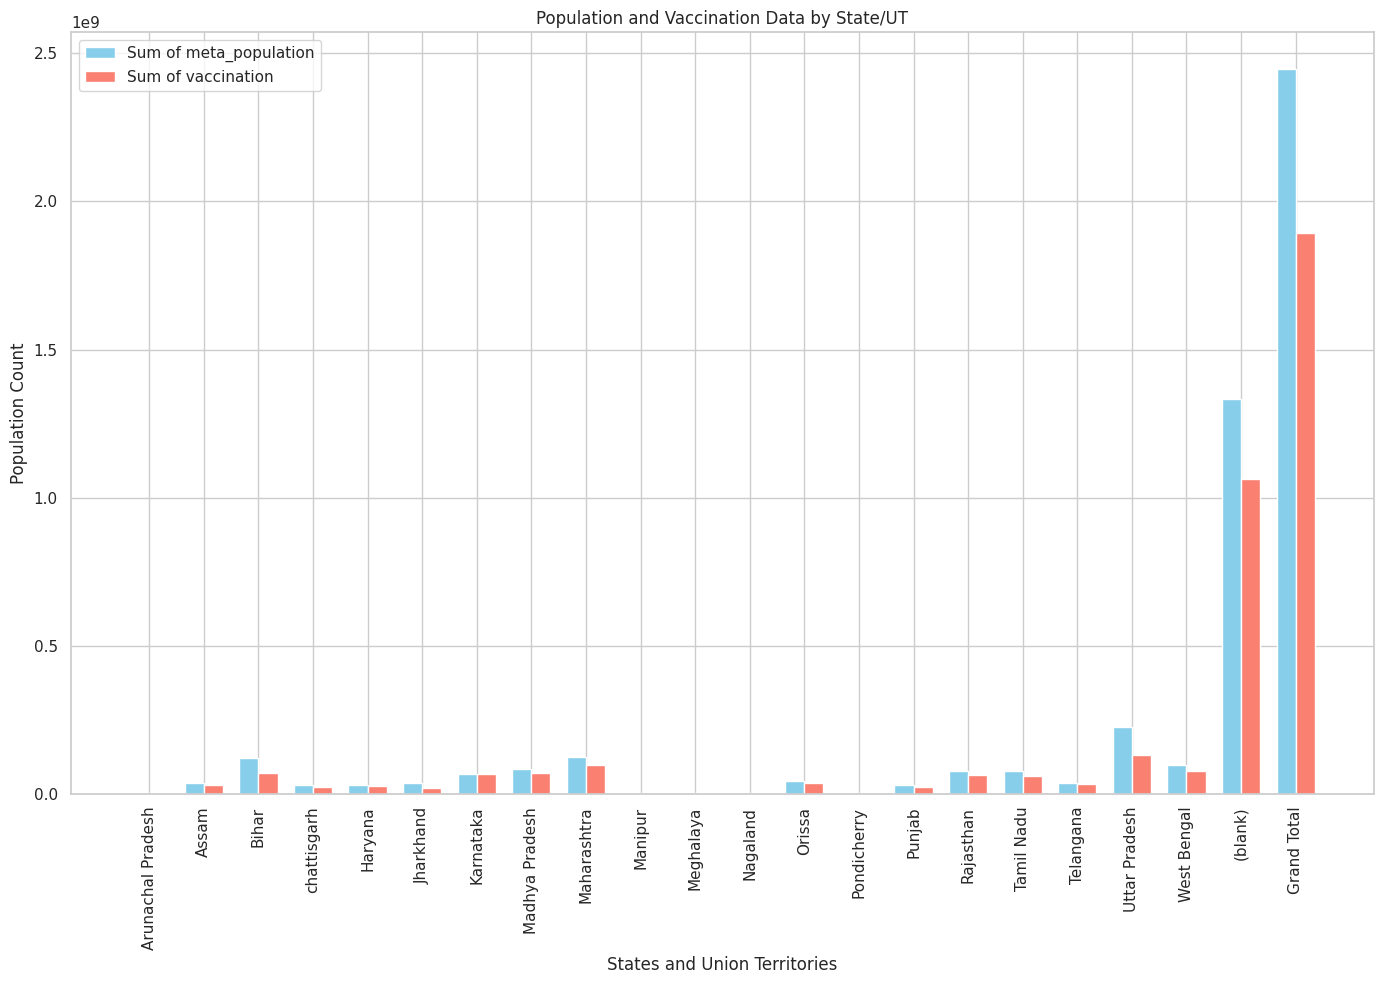

In [ ]:



import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('/content/country-population-vaccination.csv')
# Load the data from the CSV file


# Extract relevant columns
states = df['State Name']
meta_population = df['Sum of meta_population']
vaccination = df['Sum of vacination']

# Width of each bar
bar_width = 0.35

# Plotting
plt.figure(figsize=(14, 10))

# Plotting bars for meta_population
bars1 = np.arange(len(states))  # Positions for the first set of bars
plt.bar(bars1, meta_population, width=bar_width, color='skyblue', label='Sum of meta_population')

# Plotting bars for vaccination next to meta_population bars
bars2 = [x + bar_width for x in bars1]  # Positions for the second set of bars
plt.bar(bars2, vaccination, width=bar_width, color='salmon', label='Sum of vaccination')

# Adding labels and title
plt.xlabel('States and Union Territories')
plt.ylabel('Population Count')
plt.title('Population and Vaccination Data by State/UT')

# Adjusting x-axis ticks and labels
plt.xticks(bars1 + bar_width / 2, states, rotation=90)

# Adding legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()



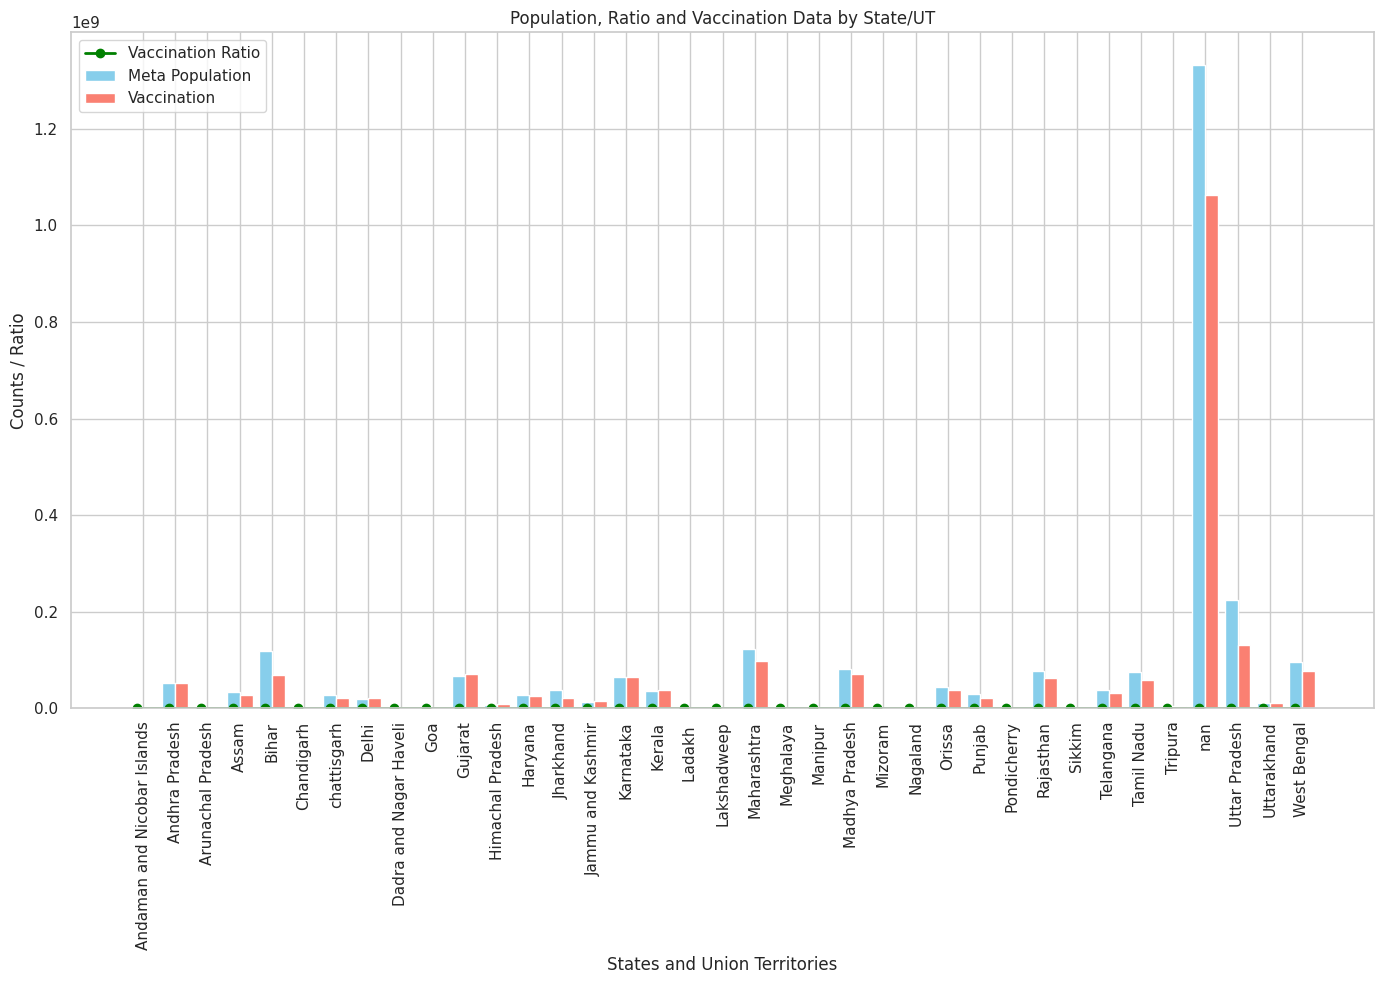

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('/content/test-population-ratio.csv')

# Extract relevant columns
states = df['state_name']
meta_population = df['meta_population']
vacination = df['vacination']
vacination_ratio = df['vacination_ratio']

# Plotting
plt.figure(figsize=(14, 10))

# Plotting bars for meta_population and vacination
bar_width = 0.4
bars1 = range(len(states))  # Positions for the bars
plt.bar(bars1, meta_population, width=bar_width, color='skyblue', label='Meta Population')
plt.bar([b + bar_width for b in bars1], vacination, width=bar_width, color='salmon', label='Vaccination')

# Plotting vacination_ratio as a line plot
plt.plot(bars1, vacination_ratio, marker='o', color='green', linestyle='-', linewidth=2, label='Vaccination Ratio')

# Adding labels and title
plt.xlabel('States and Union Territories')
plt.ylabel('Counts / Ratio')
plt.title('Population, Ratio and Vaccination Data by State/UT')

# Adjusting x-axis ticks and labels
plt.xticks([r + bar_width / 2 for r in range(len(states))], states, rotation=90)

# Adding legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


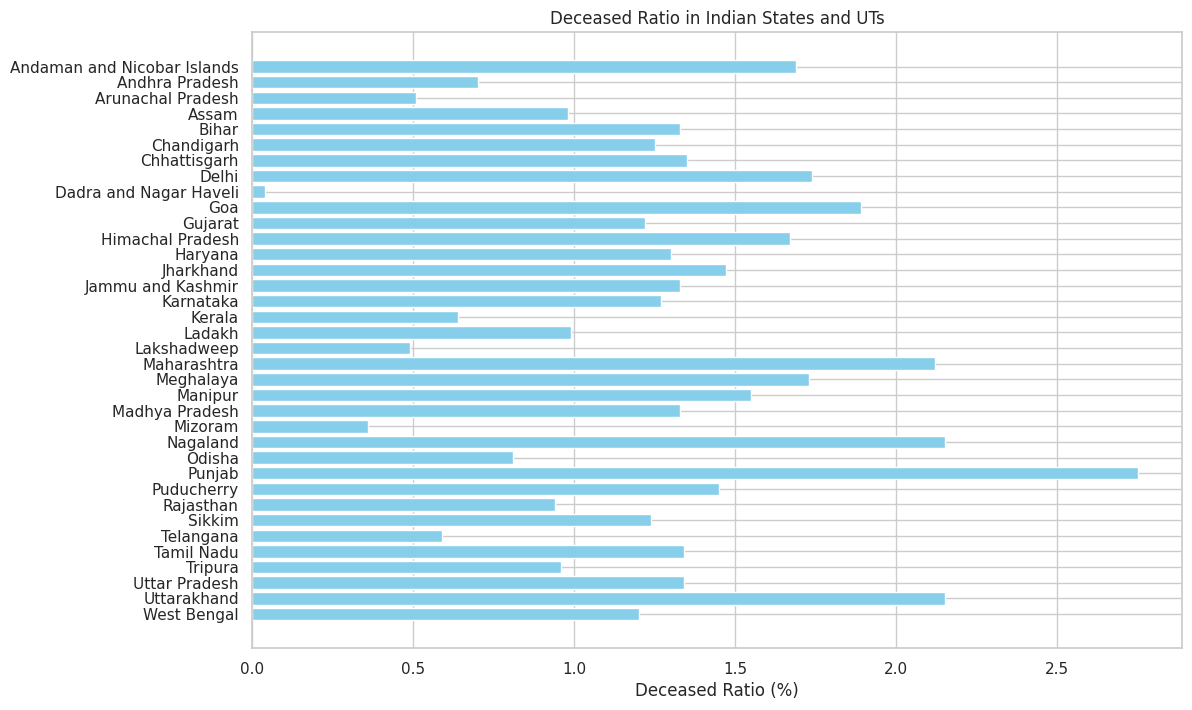

In [ ]:
import matplotlib.pyplot as plt

# Data: Replace with your provided data
data = {
    "Andaman and Nicobar Islands": 1.69,
    "Andhra Pradesh": 0.70,
    "Arunachal Pradesh": 0.51,
    "Assam": 0.98,
    "Bihar": 1.33,
    "Chandigarh": 1.25,
    "Chhattisgarh": 1.35,  # Corrected spelling
    "Delhi": 1.74,
    "Dadra and Nagar Haveli": 0.04,
    "Goa": 1.89,
    "Gujarat": 1.22,
    "Himachal Pradesh": 1.67,
    "Haryana": 1.30,
    "Jharkhand": 1.47,
    "Jammu and Kashmir": 1.33,
    "Karnataka": 1.27,
    "Kerala": 0.64,
    "Ladakh": 0.99,  # Corrected spelling
    "Lakshadweep": 0.49,
    "Maharashtra": 2.12,
    "Meghalaya": 1.73,
    "Manipur": 1.55,
    "Madhya Pradesh": 1.33,
    "Mizoram": 0.36,
    "Nagaland": 2.15,
    "Odisha": 0.81,  # Corrected name
    "Punjab": 2.75,
    "Puducherry": 1.45,  # Corrected name
    "Rajasthan": 0.94,
    "Sikkim": 1.24,
    "Telangana": 0.59,
    "Tamil Nadu": 1.34,
    "Tripura": 0.96,
    "Uttar Pradesh": 1.34,
    "Uttarakhand": 2.15,
    "West Bengal": 1.20
}

# Extract state names and deceased ratios
states = list(data.keys())
deceased_ratios = list(data.values())

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.barh(states, deceased_ratios, color='skyblue')
plt.xlabel('Deceased Ratio (%)')
plt.title('Deceased Ratio in Indian States and UTs')
plt.gca().invert_yaxis()  # Invert y-axis to display highest ratio at the top
plt.show()
